In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
import seaborn as sns
import requests
from pathlib import Path

In [196]:
#Reading in data from Table 1a 

multi_city_df = pd.read_csv("../Resources/Multi_City_Airport_Markets.csv")

multi_city_df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,NaN,201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,NaN,201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,NaN,201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [197]:
# Create a new DataFrame with updated column names
new_df = multi_city_df.rename(columns={
    'citymarketid_1': 'citymarketid_Dept',
    'citymarketid_2': 'citymarketid_Arriv',
    'city1': 'Departure_city',
    'city2': 'Arrival_city',
    'airportid_1': 'Airportid_Departure',
    'airportid_2': 'Airportid_Arrival',
    'airport_1': 'D_airport_code',
    'airport_2': 'A_airport_code',
    'Geocoded_City1': 'Geocoded_Departure',
    'Geocoded_City2': 'Geocoded_Arrival',
    'nsmiles': 'Non_stop_Miles'
})
# Display the updated DataFrame
new_df.tail()

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
16422,Table 1a,2017,1,30436,30852,"Tucson, AZ","Washington, DC (Metropolitan Area)",15376,10821,TUS,...,300.72,AA,0.4260,328.88,WN,0.3484,260.33,"Tucson, AZ\n(35.167852, -103.726151)","Washington, DC (Metropolitan Area)\n(38.892062...",201711537610821TUSBWI
16423,Table 1a,2017,1,30436,30852,"Tucson, AZ","Washington, DC (Metropolitan Area)",15376,12264,TUS,...,359.82,UA,0.4197,380.45,WN,0.1466,291.10,"Tucson, AZ\n(35.167852, -103.726151)","Washington, DC (Metropolitan Area)\n(38.892062...",201711537612264TUSIAD
16424,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",10821,14027,BWI,...,182.51,WN,0.9177,178.75,WN,0.9177,178.75,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711082114027BWIPBI
16425,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",11278,14027,DCA,...,188.65,AA,0.6508,201.20,B6,0.2887,151.23,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711127814027DCAPBI
16426,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",12264,14027,IAD,...,212.61,DL,0.4496,230.66,WN,0.1425,155.98,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711226414027IADPBI


In [198]:
a = new_df.loc[new_df["Arrival_city"] == "Tampa, FL (Metropolitan Area)", :].fillna({'Geocoded_Arrival':'Tampa, FL (Metropolitan Area)\n(37.8606, -78.804199)'})
b = new_df.loc[new_df["Arrival_city"] == "Seattle, WA", :].fillna({'Geocoded_Arrival':'Seattle, WA\n(47.603229, -122.33028)'})
c = new_df.loc[new_df["Arrival_city"] == "Washington, DC (Metropolitan Area)", :].fillna({'Geocoded_Arrival':'Washington, DC (Metropolitan Area)\n(38.892062, -77.019912)'})
d = new_df.loc[new_df["Departure_city"] == "Los Angeles, CA (Metropolitan Area)", :].fillna({'Geocoded_Departure':'Los Angeles, CA (Metropolitan Area)\n(34.052238, -118.243344)'})

new_df.loc[new_df["Arrival_city"] == "Tampa, FL (Metropolitan Area)"] = a
new_df.loc[new_df["Arrival_city"] == "Seattle , WA"] = b
new_df.loc[new_df["Arrival_city"] == "Washington, DC (Metropolitan Area)"] = c
new_df.loc[new_df["Departure_city"] == "Los Angeles, CA (Metropolitan Area)"] = d


new_df.head()

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,"Washington, DC (Metropolitan Area)\n(38.892062...",201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,"Washington, DC (Metropolitan Area)\n(38.892062...",201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [199]:
clean_df = new_df[(new_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (new_df['Arrival_city'].isin(['Seattle, WA', 'Washington, DC (Metropolitan Area)', 'Tampa, FL (Metropolitan Area)']))]
clean_df

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
1285,Table1a,2018,4,32575,33195,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12892,15304,LAX,...,296.07,DL,0.3715,368.40,WN,0.3380,241.02,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289215304LAXTPA
1292,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289214747LAXSEA
1319,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,12264,LAX,...,310.32,UA,0.5517,357.82,AS,0.2095,226.80,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289212264LAXIAD
1324,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,11278,LAX,...,305.38,AA,0.4535,321.18,AS,0.2020,260.36,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289211278LAXDCA
1325,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,10821,LAX,...,221.51,WN,0.4442,242.89,NK,0.1541,123.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289210821LAXBWI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15847,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,10821,SNA,...,293.13,WN,0.4824,279.07,UA,0.1887,261.29,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490810821SNABWI
15848,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,11278,SNA,...,341.93,AA,0.3481,399.35,F9,0.1069,160.55,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490811278SNADCA
15853,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,12264,SNA,...,371.96,UA,0.5643,389.77,AA,0.2151,365.07,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490812264SNAIAD
15881,Table 1a,2017,1,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",14908,14747,SNA,...,156.86,AS,0.7098,157.14,AS,0.7098,157.14,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Seattle, WA\n(47.603229, -122.33028)",201711490814747SNASEA


In [200]:
# Export the cleaned dataframe to the Resources folder as a CSV, without the Pandas index, but with the header
# clean_df.to_csv("../Resources/Clean_Multi_City_Airport_Markets.csv", index=False, header=True)

In [201]:
#Reading in Table 2 into a csv 
state_city_df = pd.read_csv("../Resources/State_City-Pair_Markets.csv")
state_city_df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2017,1,31057,34614,"Charlotte, NC","Salt Lake City, UT",1727,257,266.93,DL,0.4743,276.41,AA,0.4163,264.35,1,"Charlotte, NC\n(35.222936, -80.840161)","Salt Lake City, UT\n(40.758478, -111.888142)"
1,2017,1,30666,30466,"Bellingham, WA","Phoenix, AZ",1208,173,124.68,G4,0.7641,108.19,G4,0.7641,108.19,1,"Bellingham, WA\n(41.698264, -88.077915)","Phoenix, AZ\n(30.406931, -87.217578)"
2,2017,1,34614,30559,"Salt Lake City, UT","Seattle, WA",689,950,192.68,DL,0.4988,205.89,AS,0.4483,180.66,1,"Salt Lake City, UT\n(40.758478, -111.888142)","Seattle, WA\n(47.603229, -122.33028)"
3,2017,2,33244,31703,"Memphis, TN","New York City, NY (Metropolitan Area)",1002,598,293.36,AA,0.3623,273.59,AA,0.3623,273.59,1,"Memphis, TN\n(35.143378, -90.052136)","New York City, NY (Metropolitan Area)\n(40.123..."
4,2017,3,33198,31123,"Kansas City, MO","St. Louis, MO",237,202,155.21,WN,1.0000,155.21,WN,1.0000,155.21,1,"Kansas City, MO\n(39.099792, -94.578559)","St. Louis, MO\n(38.630276, -90.200309)"


In [205]:
# Reduced table from LA to Tampa, Washington DC, and Seattle
passenger_numbers_and_distance_df = clean_df.loc[
    (clean_df["Departure_city"] == "Los Angeles, CA (Metropolitan Area)") &
    (clean_df["Arrival_city"].isin(["Tampa, FL (Metropolitan Area)", "Washington, DC (Metropolitan Area)", "Seattle, WA"])),
    ["Year","quarter", "Departure_city", "Arrival_city", "Non_stop_Miles", "passengers", "fare"]
]

passenger_numbers_and_distance_df.head()

,Year,quarter,Departure_city,Arrival_city,Non_stop_Miles,passengers,fare
1285,2018,4,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",2158,792,296.07
1292,2018,4,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",978,4151,177.68
1319,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",2329,2059,310.32
1324,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",2329,1388,305.38
1325,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",2329,1605,221.51


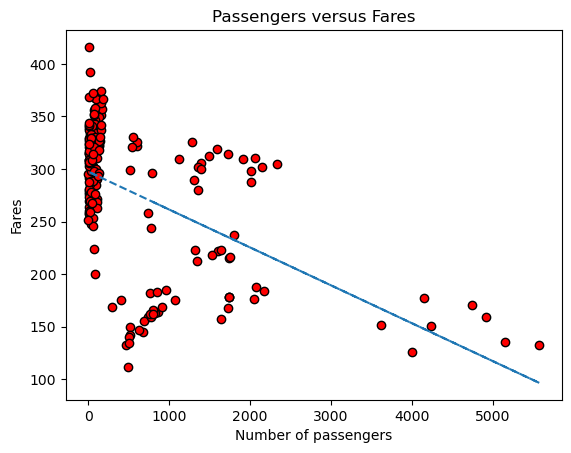

The correlation between both factors is -0.54


In [206]:
# Plot to show relationship between the number of passenger and the fare.
passengers = passenger_numbers_and_distance_df["passengers"]
fares = passenger_numbers_and_distance_df["fare"]

slope, intercept, rvalue, pvalue, stderr = stats.linregress (passengers,fares)
regress_value = passengers*slope + intercept

plt.scatter(passengers, fares, marker="o", facecolors="red", edgecolors="black")
plt.plot(passengers, regress_value, "--")
# plt.xticks(passengers, rotation=90)
plt.title("Passengers versus Fares")
plt.xlabel("Number of passengers")
plt.ylabel("Fares")
plt.show()

correlation = st.pearsonr(passengers,fares)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# print(f"The r-squared is : {rvalue **2}")
# plt.savefig("../Images/IceCreamSales.png")


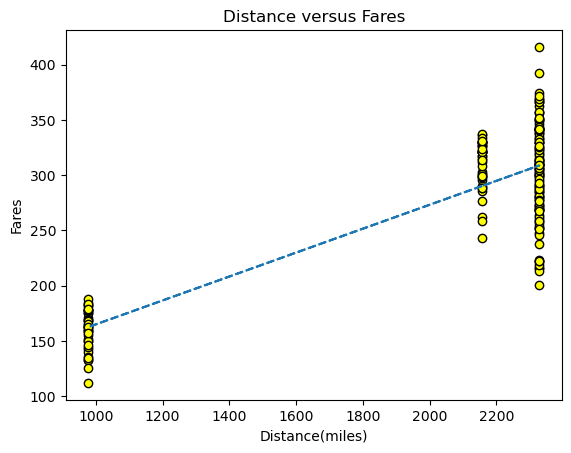

The correlation between both factors is 0.84


In [207]:
# Plot to show relationship between the distance and the fare.
distance = passenger_numbers_and_distance_df["Non_stop_Miles"]
fares = passenger_numbers_and_distance_df["fare"]

p_slope, p_int, p_r, p_p, _std_err = stats.linregress (distance,fares)
p_fit = distance*p_slope + p_int

plt.scatter(distance, fares, marker="o", facecolors="yellow", edgecolors="black")
plt.plot(distance, p_fit, "--")
# plt.xticks(distance, rotation=90)
plt.title("Distance versus Fares")
plt.xlabel("Distance(miles)")
plt.ylabel("Fares")
plt.show()

correlation = st.pearsonr(distance,fares)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# print(f"The r-squared is : {p_r **2}")
# plt.savefig("../Images/IceCreamSales.png")